In [ ]:
# Class_Session_7_Activity-[Module 5-Group Comparisons]-DVP-LS24

In [ ]:
# M5 - Cricket dataset - Programming Data Visualizations that Show Group Comparisons
# Created by Dr. Esther Ledelle Mead, Southern Arkansas University, Assistant Professor of Computer Science
# Created for Dr. Esther Mead, SAU Data Visualization Programming, Long Summer 2024
# Created July 12, 2024

In [ ]:
# Dataset source: https://www.kaggle.com/datasets/iamsouravbanerjee/ipl-player-performance-dataset?resource=download
# Original dataset from source is called, “Most Runs All Seasons Combine.csv”; the filename was changed here to "Class_Session_7_Activity.csv" for convenience.

In [ ]:
# Explanation of Example Use Case used in these exercises:
### A new brand of sports drink wants to hire a top cricket player to be their "celebrity endorser" for their product so that they can increase sales.
### They want to select three players to approach with a potential deal.
### Which three players are good candidates to suggest to the company and why?

In [1]:
import piplite # When using the JupyterLite web-based environment, an "import" statement is used to load a layer called "piplite" that is needed for installing specific session-based libraries inside of a wrapper.
await piplite.install("seaborn") # An "await" statement is used for installing (when/if later called on) a library for plotting called "seaborn" from within a piplite wrapper for use in a session within the JupyterLite web-based environment.

In [2]:
# Import required libraries
import seaborn as sns # An "import" statement is used for importing a library for plotting called "seaborn" and assigning it to a variable called "sns".
import pandas as pd # An "import" statement is used for importing a library for data processing called "pandas" and assigning it to a variable called "pd".
import numpy as np # An "import" statement is used for importing a library for scientific computing called "numpy" and assigning it to a variable called "np".
import pandas.testing as tm # For importing a package called "testing" from a library called "pandas" for comparing groups (testing that dataframes match appropriately be able to compare them) and assigning it to a variable called "tm".
import matplotlib.pyplot as plt # An "import" statement is used for importing a module called "pyplot" from a library call "matplotlib" for plotting and assigning it to a variable called "plt".

In [3]:
df = pd.read_csv("Class_Session_7_Activity.csv") # The read_csv() function from pandas is used to load a CSV dataset file called "Class_Session_7_Activity.csv" and assigning it to a variable called "df".

In [4]:
df.head(8) # The head() function is used to show the first eight (8) rows of the dataset that was assigned to a variable called "df".

,ID,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26
1,1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8
2,2,Sanath Jayasuriya,14,14,2,518,114*,43.16,309,167.63,1,2,58,31
3,3,Shane Watson,15,15,5,472,76*,47.20,311,151.76,0,4,47,19
4,4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8
5,5,Adam Gilchrist,14,14,1,436,109*,33.53,318,137.10,1,3,51,19
6,6,Yusuf Pathan,16,15,1,435,68,31.07,243,179.01,0,4,43,25
7,7,Suresh Raina,16,14,3,421,55*,38.27,296,142.22,0,3,35,18


In [5]:
# The next few code blocks introduces some new-to-you code lines and documentation lines for doing some required data processing with this dataset.
df.HS = df.HS.str.replace('*', '') # Use a function called "str.replace" to remove problematic characters such as asterisks (*) from the data of a selected column from the df (remove it and replace it with nothing).
# You can experiment on your own later if you want to with regard to how they will be deprecating the regex values in future versions of this function.
# The FutureWarning is not an error. Feel free to copy the FutureWarning into a simply Google search to explore possible solutions for how to handle this FutureWarning.

<ipython-input-5-10e880dff659>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.HS = df.HS.str.replace('*', '') # Use a function called "str.replace" to remove problematic characters such as asterisks (*) from the data of a selected column from the df (remove it and replace it with nothing).


In [6]:
# For example, one possible solution for handling the FutureWarning is to simply edit the above code to handle the warning that is received.
df.HS = df.HS.str.replace('*', '', regex=False)

In [7]:
df.head() # Use a function called "head()" the see the resuls of your "str.replace" function executed in a previous code block. (To check to see if the problematic characters were successfully removed from the intended column data.)

,ID,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26
1,1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8
2,2,Sanath Jayasuriya,14,14,2,518,114,43.16,309,167.63,1,2,58,31
3,3,Shane Watson,15,15,5,472,76,47.20,311,151.76,0,4,47,19
4,4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8


In [8]:
# The dataset is quite large and can be cumbersome and hard to visualize in terms of getting any actual data insights from it for the purposes of the Example Use Case (explained above).
# There are many ways to process the dataset to be able to answer the questions from the example use case. The following series of code blocks represents one way.
# Since the sports drink company only wants to consider from among three cricket players, we can process the data to sort by performance.
df.sort_values(by="Avg", ascending=False) # Use a function called "sort_values()" to sort the data by a specific column in a specific way. The function sort in ascending order by default (lowest first), so we add an argument to set it to False to make it sort by descending instead (highest first).
# The results of the sort_values() function will automatically output on the screen.

,ID,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
42,42,Luke Pomersbach,5,5,4,152,79,152.0,99,153.53,0,1,13,9
1761,1761,Deepak Hooda,7,5,4,101,62,101.0,71,142.25,0,1,5,5
61,61,Simon Katich,2,2,1,96,75,96.0,69,139.13,0,1,11,2
1074,1074,Albie Morkel,4,3,2,86,73,86.0,65,132.30,0,1,9,2
35,35,Michael Hussey,4,3,1,168,116,84.0,100,168.00,1,0,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1012,Mohit Sharma,16,1,1,1,1,0.0,3,33.33,0,0,0,0
1010,1010,Karanveer Singh,5,1,1,1,1,0.0,1,100.00,0,0,0,0
1009,1009,Vikramjeet Malik,1,1,1,1,1,0.0,2,50.00,0,0,0,0
1005,1005,Jasprit Bumrah,11,2,2,1,1,0.0,3,33.33,0,0,0,0


In [9]:
# Since the sports drink company only wants to consider from among three cricket players, we can process the data to only look at the performance of the Top 20 players.
# Now let's add some code to what we wrote above to create a new dataframe that repeats that sort and then selects just the top 20 players of the dataset (you can play around with any number though).
Top20 = df.sort_values(by="Avg", ascending=False).head(20) # Use a function called "sort_values()" to sort the data by a specific column in descending order; adding the "head()" function to only select the top 20 rows (being the 20 highest values in the dataset for that specified column), and assigning it to a new dataframe called "Top20".

In [10]:
Top20 # Call the new "Top20" dataframe to see if the contents look correctly generated.

,ID,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
42,42,Luke Pomersbach,5,5,4,152,79,152.00,99,153.53,0,1,13,9
1761,1761,Deepak Hooda,7,5,4,101,62,101.00,71,142.25,0,1,5,5
61,61,Simon Katich,2,2,1,96,75,96.00,69,139.13,0,1,11,2
1074,1074,Albie Morkel,4,3,2,86,73,86.00,65,132.30,0,1,9,2
35,35,Michael Hussey,4,3,1,168,116,84.00,100,168.00,1,0,12,11
182,182,Manish Pandey,5,4,2,168,114,84.00,118,142.37,1,0,17,4
1572,1572,MS Dhoni,15,12,7,416,84,83.20,309,134.62,0,3,22,23
1764,1764,Tom Curran,5,4,3,83,54,83.00,62,133.87,0,1,5,3
618,618,JP Duminy,9,9,6,244,74,81.33,190,128.42,0,2,13,11
1143,1143,Virat Kohli,16,16,4,973,113,81.08,640,152.03,4,7,83,38


In [11]:
# It does look correct, but we have some repeat player names in there, and we don't want to have repeat names (even though they have different data) in our data visualizations (DVs).
# So, let's write some code to drop the row(s) that has/have the lowest Avg score of the repeat players that we see in our Top20 list by using their "ID".
Top20[(Top20.ID != 1434) & (Top20.ID != 897)] # Use the "!=" not equal to operator to regenerate the "Top20" dataframe without including specified values for a specific column. (This will remove the two rows of player, "MS Dhoni" with the lowest of their three Avg values.)
# The results of will automatically output on the screen.

,ID,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
42,42,Luke Pomersbach,5,5,4,152,79,152.00,99,153.53,0,1,13,9
1761,1761,Deepak Hooda,7,5,4,101,62,101.00,71,142.25,0,1,5,5
61,61,Simon Katich,2,2,1,96,75,96.00,69,139.13,0,1,11,2
1074,1074,Albie Morkel,4,3,2,86,73,86.00,65,132.30,0,1,9,2
35,35,Michael Hussey,4,3,1,168,116,84.00,100,168.00,1,0,12,11
182,182,Manish Pandey,5,4,2,168,114,84.00,118,142.37,1,0,17,4
1572,1572,MS Dhoni,15,12,7,416,84,83.20,309,134.62,0,3,22,23
1764,1764,Tom Curran,5,4,3,83,54,83.00,62,133.87,0,1,5,3
618,618,JP Duminy,9,9,6,244,74,81.33,190,128.42,0,2,13,11
1143,1143,Virat Kohli,16,16,4,973,113,81.08,640,152.03,4,7,83,38


In [12]:
len(Top20[(Top20.ID != 1434) & (Top20.ID != 897)]) # Use the "len()" function to see how many rows we have in our Top20 after our removal of the specificly identified rows.

18

In [13]:
# From the above output, we can see that we, unfortunately, now only would have 18 rows in our revised Top20.
# Without having had executed the above steps, however, we would have not have been able to determine and identify the ideal data targeted for removal.
# Regardless, now we know what we need to target for removal, so, let's repeat some code to redo some of our operations in a different order.
# Let's start again with our original df and drop the Dhoni rows from that df and overwrite it. (We can get the specific "ID"s of these rows targeted for removal from looking at the previous output that we had.
df = df[(df.ID != 1434) & (df.ID != 897)] # This will remove the two rows of player, "MS Dhoni" with the lowest of their three Avg values.

In [14]:
df # Call the newly generated "df" dataframe to see if the contents now are free of repeat "Player" names.

,ID,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26
1,1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8
2,2,Sanath Jayasuriya,14,14,2,518,114,43.16,309,167.63,1,2,58,31
3,3,Shane Watson,15,15,5,472,76,47.20,311,151.76,0,4,47,19
4,4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1981,Kuldip Yadav,1,1,1,0,0,0.00,4,0.00,0,0,0,0
1982,1982,Sarfaraz Khan,2,2,0,0,0,0.00,4,0.00,0,0,0,0
1983,1983,Anuj Rawat,2,1,0,0,0,0.00,1,0.00,0,0,0,0
1984,1984,Jimmy Neesham,3,2,0,0,0,0.00,2,0.00,0,0,0,0


In [15]:
# Also from the output from the previous Top20 dataframe call above we can actually see that there is another repeat name, "Wriddhiman Saha", so we need to repeat the steps needed to deal with the issue before we move on to create our DVs.
df = df[(df.ID != 499)] # This will remove the row of player, "Wriddhiman Saha" with the lowest of their two Avg values (the specific "ID"s seen from the previous Top20 dataframe output).

In [16]:
# Now let's repeat our sort and selection of just the Top20 (overwriting our old Top20 dataframe) and see if it looks correct.
Top20 = df.sort_values(by="Avg", ascending=False).head(20)
Top20 # To make it show on the screen
# You will see from the resultant output below that it now looks correct (we have 20 non-repeating players sorted by Avg descending), and we can now move on from data processing to data visualization.

,ID,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
42,42,Luke Pomersbach,5,5,4,152,79,152.00,99,153.53,0,1,13,9
1761,1761,Deepak Hooda,7,5,4,101,62,101.00,71,142.25,0,1,5,5
61,61,Simon Katich,2,2,1,96,75,96.00,69,139.13,0,1,11,2
1074,1074,Albie Morkel,4,3,2,86,73,86.00,65,132.30,0,1,9,2
35,35,Michael Hussey,4,3,1,168,116,84.00,100,168.00,1,0,12,11
182,182,Manish Pandey,5,4,2,168,114,84.00,118,142.37,1,0,17,4
1572,1572,MS Dhoni,15,12,7,416,84,83.20,309,134.62,0,3,22,23
1764,1764,Tom Curran,5,4,3,83,54,83.00,62,133.87,0,1,5,3
618,618,JP Duminy,9,9,6,244,74,81.33,190,128.42,0,2,13,11
1143,1143,Virat Kohli,16,16,4,973,113,81.08,640,152.03,4,7,83,38


In [ ]:
# Space intentionally blank to separate sections.

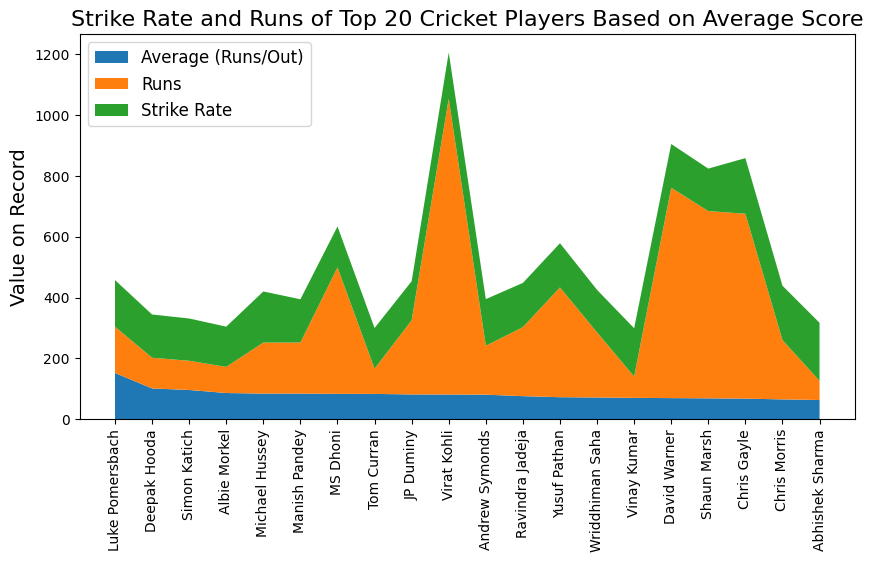

In [17]:
# Create the basic structure for a Stacked Area Chart and add some customization components.
# You can add as many stacks as you want to, keeping in mind that adding too many will render the chart difficult to read and therefore ineffective for decision making.
x=Top20["Player"] # Choose a column to define as the X variable; You can experiment with using different variables from the dataset.
y1=Top20["Avg"] # Choose a column to define as the first Y variable to include in the "stack"; You can experiment with using different variables from the dataset.
y2=Top20["Runs"] # Choose a column to define as the second Y variable to include in the "stack"; You can experiment with using different variables from the dataset.
y3=Top20["SR"] # Choose a column to define as the third Y variable to include in the "stack"; You can experiment with using different variables from the dataset.
plt.figure(figsize=(10, 5)) # Create the figure object. Add an argument for manually adjusting the figure size.
plt.stackplot(x,y1, y2, y3, labels=['Average (Runs/Out)', 'Runs','Strike Rate']) # Draw the stacked area plot. Put your Y variables in the order in which you want them to be stacked. If you chose different variables for your stacks, don't forget to edit the names here.
plt.title(label="Strike Rate and Runs of Top 20 Cricket Players Based on Average Score", fontsize=16) # Add a title to your DV. Add an argument to adjust your font size. If you chose different variables, don't forget to edit the title here.
plt.ylabel("Value on Record", fontsize=14) # Add a y-axis label and adjust the font size.
plt.legend(loc='upper left', fontsize=12) # Add a legend and adjust the font size and legend location.
plt.yticks(fontsize=10) # Adjust the font size of the text of the y axis ticks.
plt.xticks(fontsize=10, rotation = 90) # Adjust the font size of the text of the x axis ticks and rotate the text so that all will be readable. (In our example, we want to see all 20 player names on the DV.)
plt.savefig("Cricket-Stacked_Area_Chart-Python.png") # Use the "savefig()" function of matplotlib to save the DV to a file called "Cricket-Stacked_Area_Chart-Python.png"
# If any text on your DV is cut off in your saved image, use the "right-click, copy output to clipboard, paste into assignment template" method (as shown in CS6P2 video demonstrating A4).
plt.show() # To show the plot on the screen. (Don't always need this; it depends on the environment.)
# Explore the source of where some of this code came from: https://www.python-graph-gallery.com/stacked-area-plot/
# Experiment with customizing your stacked area chart: https://www.python-graph-gallery.com/stacked-area-plot/
# OPTIONAL: For advanced students, if you want to try to experiment with adding data values onto your chart, here are two sources that you can ADAPT CODE from:
### https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
### and
### https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels

In [ ]:
"""
Data Insights:
The above stacked area chart data visualization (DV) allows for comparison of cricket players among the Top 20 players based on Average Score. For example, Luke Pomersbach is the top player when the comparison is based on the initial metric of 
Average Score. Virat Kohli is the top player when the player comparison is based on Runs. And, Chris Gayle is the top player when the comparison is based on Strike Rate. Therefore, these three players would be good candidates to suggest to the 
company to approach with a potential deal to be the "celebrity endorser" for the new brand of sports drink.
"""

In [ ]:
# Space intentionally blank to separate sections.

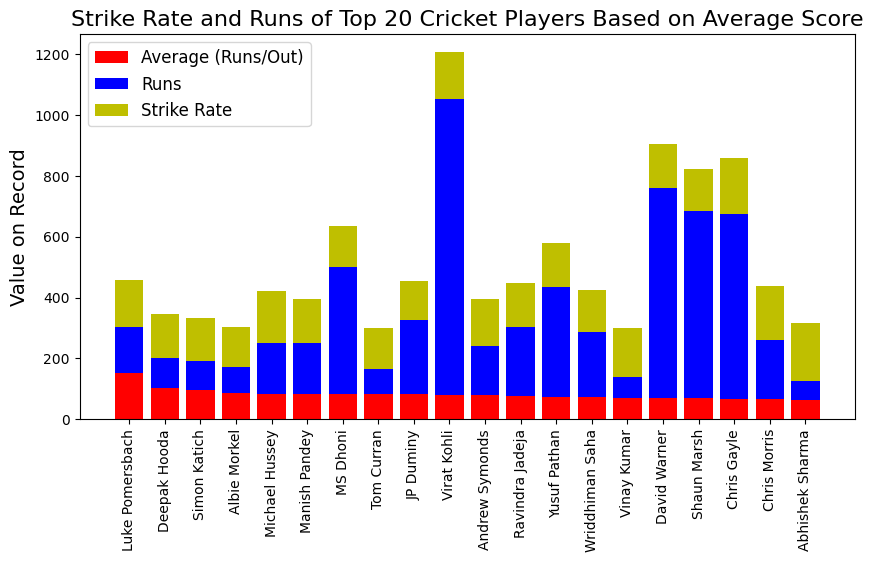

In [18]:
# Create the basic structure for a Stacked Bar Chart and add some customization components.
# You can add as many stacks as you want to, keeping in mind that adding too many will render the chart difficult to read and therefore ineffective for decision making.
x=Top20["Player"] # Choose a column to define as the X variable; You can experiment with using different variables from the dataset.
y1=Top20["Avg"] # Choose a column to define as the first Y variable to include in the "stack"; You can experiment with using different variables from the dataset.
y2=Top20["Runs"] # Choose a column to define as the second Y variable to include in the "stack"; You can experiment with using different variables from the dataset.
y3=Top20["SR"] # Choose a column to define as the third Y variable to include in the "stack"; You can experiment with using different variables from the dataset.
plt.figure(figsize=(10, 5)) # Create the figure object. Add an argument for manually adjusting the figure size.
plt.bar(x, y1, color='r') # Set which of your Y variables you want to be the first (bottom) stack. You can experiment with colors here.
plt.bar(x, y2, bottom=y1, color='b') # Set which of your Y variables you want to be the second stack. You can experiment with colors here.
plt.bar(x, y3, bottom=y1+y2, color='y') # Set which of your Y variables you want to be the third stack. You can experiment with colors here.
plt.title(label="Strike Rate and Runs of Top 20 Cricket Players Based on Average Score", fontsize=16) # Add a title to your DV. Add an argument to adjust your font size. If you chose different variables, don't forget to edit the title here.
plt.ylabel("Value on Record", fontsize=14) # Add a y-axis label and adjust the font size.
plt.legend(["Average (Runs/Out)", "Runs", "Strike Rate"], loc='upper left', fontsize=12) # Add a legend with customized labels and adjust the font size and legend location. If you used different variables, don't forget to edit the legend.
plt.yticks(fontsize=10) # Adjust the font size of the text of the y axis ticks.
plt.xticks(fontsize=10, rotation = 90) # Adjust the font size of the text of the x axis ticks and rotate the text so that all will be readable. (In our example, we want to see all 20 player names on the DV.)
plt.savefig("Cricket-Stacked_Bar_Chart-Python.png") # Use the "savefig()" function of matplotlib to save the DV to a file called "Cricket-Stacked_Bar_Chart-Python.png"
# If any text on your DV is cut off in your saved image, use the "right-click, copy output to clipboard, paste into assignment template" method (as shown in CS6P2 video demonstrating A4).
plt.show() # To show the plot on the screen. (Don't always need this; it depends on the environment.)
# Explore the source of where some of this code came from: https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/
# Experiment with customizing your stacked bar chart: https://towardsdatascience.com/improving-your-data-visualizations-with-stacked-bar-charts-in-python-f18e2b2b9b70
# OPTIONAL: For advanced students, if you want to try to experiment with adding data values onto your chart, here are two sources that you can ADAPT CODE from:
#### https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
#### and
#### https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels

In [ ]:
"""
Data Insights:
The above stacked bar chart data visualization (DV) provides additional visual evidence of comparison of cricket players among the Top 20 players based on Average Score. Again it is revealed that Luke Pomersbach is the top player when the 
comparison is based on the initial metric of Average Score. Virat Kohli is again seen as the top player when the player comparison is based on Runs. And, Chris Gayle is again seen as the top player when the comparison is based on Strike Rate. 
This DV, therefore, provides additional support for making the recommendation that these three players would be good candidates to suggest to the company to approach with a potential deal to be the "celebrity endorser" for the new brand of sports 
drink.
"""

In [ ]:
# Space intentionally blank to separate sections.

In [19]:
# To make the next data visualization (heatmap), we have to find the min and max of values of the columns that you are going to use (in this example, Dr. Mead used Runs, Avg, and SR; so, you locate the LOWEST min of the three, and the HIGHEST max for the three)
Top20.describe() # Use the "describe()" function to generate a table of summary statistics for a specified set of data.

,ID,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,925.700000,8.850000,7.25000,3.500000,284.700000,81.724500,191.250000,150.316500,0.550000,2.000000,23.900000,12.750000
std,693.554468,5.060424,4.37547,2.373095,251.305874,19.311938,167.409323,17.526482,0.998683,2.294157,22.327467,11.898142
min,0.000000,2.000000,2.00000,1.000000,63.000000,63.000000,33.000000,128.420000,0.000000,0.000000,3.000000,2.000000
25%,151.750000,4.000000,3.75000,2.000000,99.750000,69.800000,70.500000,139.542500,0.000000,0.750000,10.500000,4.750000
50%,1108.500000,8.000000,5.00000,3.000000,181.500000,80.790000,113.500000,144.685000,0.000000,1.000000,15.000000,9.000000
75%,1563.000000,12.750000,12.00000,4.000000,374.750000,84.000000,263.250000,154.920000,1.000000,3.000000,26.250000,15.000000
max,1867.000000,16.000000,16.00000,9.000000,973.000000,152.000000,640.000000,190.900000,4.000000,8.000000,83.000000,44.000000


In [20]:
Top20_heat = Top20[["Player", "Avg", "Runs", "SR"]].set_index('Player') # Create a new dataframe to select only specific columns for your heatmap and use the "set.index()" function to designate which variable to use as the "rows" in the heatmap table. You can experiment with using different variables from the dataset. (In our example, we want to see the 20 player names as the rows of the DV.)
# In the above line, list your non-index variables in the order in which you want them to be displayed in the heatmap table.
# You can add as many variables to be the columns of your heatmap table as you want to, keeping in mind that adding too many will render the chart difficult to read and therefore ineffective for decision making.

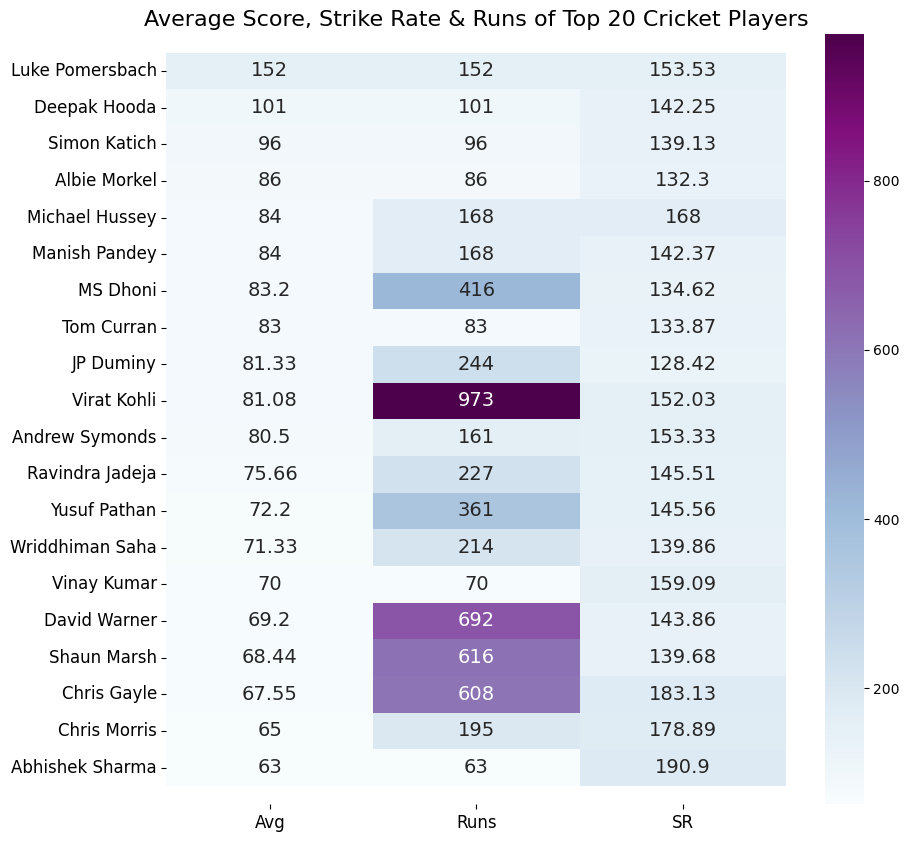

In [21]:
# Create the basic structure for a Heatmap and add some customization components.
plt.figure(figsize=(10, 10)) # Create the figure object. Add an argument for manually adjusting the figure size.
ax = sns.heatmap(Top20_heat, vmin=63, vmax=973, annot=True, fmt='g', cmap='BuPu', annot_kws={'fontsize': 14}) # Draw the heatmap using your new dataframe name you created above. This line is also where you use the min and max that you found previously with your Top20.describe(), which will be used to automatically generate the color gradient values in the legend. This line is also where you set and can experiment with colors (Source: https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/). Adding the component fmt='g' makes the value show up in the cells of the heatmap in a specific format (in this case, exactly as they are in the dataset).
bottom, top = ax.get_ylim() # This is so that we can adjust the spacing between the top and bottom of the chart and the text.
ax.set_ylim(bottom + 0.5, top - 0.5) # This is to adjust the spacing between the top and bottom of the chart and the text.
plt.title(label="Average Score, Strike Rate & Runs of Top 20 Cricket Players", fontsize=16) # Add a title to your DV. Add an argument to adjust your font size. If you chose different variables, don't forget to edit the title here.
plt.ylabel("") # This is to force the y-axis label to be blank so that we can see just the player names from the dataset. If you don't include this code line, the DV will have an unnecessary y-axis label on it, which will be whatever the column name is of the column that you set to be your index.
plt.yticks(fontsize=12) # Adjust the font size of the text of the y axis ticks.
plt.xticks(fontsize=12) # Adjust the font size of the text of the x axis ticks.
plt.savefig("YouForgotToNameMeCorrectly.png") # Use the "savefig()" function of matplotlib to save the DV to a file called "Cricket-Heatmap-Python.png"
# If any text on your DV is cut off in your saved image, use the "right-click, copy output to clipboard, paste into assignment template" method (as shown in CS6P2 video demonstrating A4).
plt.show() # To show the plot on the screen. (Don't always need this; it depends on the environment.)# Explore the source of where some of this code came from: https://indianaiproduction.com/seaborn-heatmap/
# Experiment with customizing your heatmap: https://www.python-graph-gallery.com/91-customize-seaborn-heatmap
# OPTIONAL: For advanced students: https://indianaiproduction.com/seaborn-heatmap/

In [ ]:
"""
Data Insights:
The above heatmap data visualization (DV) provides additional visual evidence of comparison of cricket players among the Top 20 players based on Average Score. The heatmap also allows for specificty in the recommendation. Again it is revealed that 
Luke Pomersbach is the top player when the comparison is based on the initial metric of Average Score, having the highest average score out of the group with 152. Virat Kohli is again seen as the top player when the player comparison is based on 
Runs, with 973. And, Chris Gayle is again seen as the top player when the comparison is based on Strike Rate, with 183.13. This DV, therefore, also provides additional support for making the recommendation that these three players would be good 
candidates to suggest to the company to approach with a potential deal to be the "celebrity endorser" for the new brand of sports drink.
"""

In [ ]:
# Space intentionally blank to separate sections.

In [ ]:
# The way we found duplicates above involved some manual steps that relied on human vision and inspection.
# Another way to find duplicates and create a data frame of them for inspection is to use a Python method called duplicated().
# Try the following experiment by running each of the separate code lines below in its own cell so that you can see the output of the results. Five (5) blank code cells have been provided for you.
df2 = pd.read_csv("Class_Session_7_Activity.csv") # Load our original dataset
df2.sort_values(by="Avg", ascending=False) # Sort it ascending on Avg column
Top20b = df2.sort_values(by="Avg", ascending=False).head(20) # Create our Top 20 subset
Top20x = Top20b[Top20b.duplicated(subset=['Player'], keep=False)] # Find duplicates and store all of them (each instance) in a variable.
Top20x # Look at the contents of the variable where the duplicates are stored
# Note: In this use case, we still need to rely on human vision and inspection to make decisions as to which duplicate to keep and which to omit from our subsequent analysis.
#       Recall, our decision was to keep the rows with the highest "Avg" value when there are rows with duplicate "Player" values, and remove the other rows using the respective "ID" values.

In [ ]:
# Next, get with your team to try to adapt the code provided in these exercises to generate the respective DVs with your assigned Use Case datasets.
# Important Note: There will be no duplicates, however, nor weird characters to deal with in your assigned Use Case datasets.

In [ ]:
# End of file